<IPython.core.display.Javascript object>


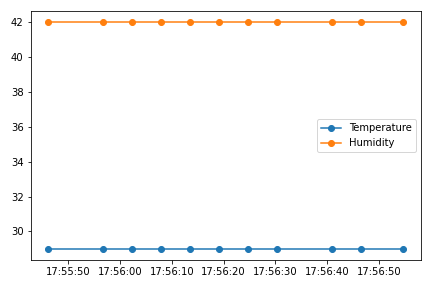

In [336]:
%matplotlib notebook
import boto3
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.dates as mdates
import time


plt.title("temperature and Humidity plot")
plt.xlabel('datetime')
plt.ylabel('C and %')

client= boto3.client('iotanalytics')
dataset= 'rpi_temperature_dataset'
dataset_url= client.get_dataset_content(datasetName=dataset)['entries'][0]['dataURI']

def animate():
    
    df= pd.read_csv(dataset_url)
    df.datetime= pd.to_datetime(df.datetime)
    df.sort_values(by='datetime', inplace=True)
    x= df.datetime
    y1=df.temperature
    y2=df.humidity

    plt.cla()
    
    plt.plot_date(x, y1, linestyle= 'solid', label='Temperature')
    plt.plot_date(x, y2, linestyle='solid' , label='Humidity')
    plt.legend()
    plt.tight_layout()
    
anima= FuncAnimation(plt.gcf(), animate(), interval=50)        
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


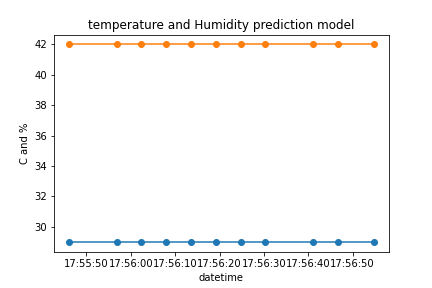

0.0


In [357]:
%matplotlib notebook
import boto3
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.dates as mdates
from scipy import stats
#import seaborn as sns
import time


plt.title("temperature and Humidity prediction model")
plt.xlabel('datetime')
plt.ylabel('C and %')

client= boto3.client('iotanalytics')
dataset= #insert ur dataset
dataset_url= client.get_dataset_content(datasetName=dataset)['entries'][0]['dataURI']



df=pd.read_csv(dataset_url)


df.datetime= pd.to_datetime(df.datetime)
df.sort_values(by='datetime', inplace=True)


x_list=[]
y=1

for row in df.datetime:
    x_list.append(y)
    y+=1

temp_slope, temp_intercept, temp_r, temp_p, temp_std_err = stats.linregress(x_list, df.temperature)
humid_slope, humid_intercept, humid_r, humid_p, humid_std_err = stats.linregress(x_list, df.humidity)

def temp_reg(x_list):
    return temp_slope * x_list + temp_intercept

def humid_reg(x_list):
    return humid_slope* x_list + humid_intercept

temp_model= list(map(temp_reg, x_list))
humid_model= list(map(humid_reg, x_list))

plt.scatter(df.datetime, df.temperature)
plt.scatter(df.datetime, df.humidity)
plt.plot(df.datetime, temp_model)
plt.plot(df.datetime, humid_model)
plt.show()

    
    